# Delay/Echo Effect
Delay/Echo – To have an incoming sound and repeat the sound shortly after. A true echo should decrease in volume as sound wave energy dissipates while travelling and disperse in different directions. The definition of echo and delay are essentially the same.

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

Import LED and Button to use both peripherals.

In [2]:
from pynq.lib import LED, Button

In [3]:
MAX_BUTTONS = 4
MAX_LEDS =4

The following code creates lists for each IO component group.

In [4]:
buttons = [Button(base.buttons[index]) for index in range(MAX_BUTTONS)] 
leds = [LED(base.leds[index]) for index in range(MAX_LEDS)]

In [5]:
pAudio = base.audio

In [6]:
pAudio.select_line_in()

Records a 10-second sample and saves it to a file.

In [12]:
pAudio.record(10)
pAudio.save("delay.wav")
pAudio.load("/home/xilinx/jupyter_notebooks/EE315-Project/Pynq-Z2 Audio/delay.wav")

Enables all the necessary functions and parameters in order to plot the various graphs of the sound file

In [7]:
%matplotlib inline
import wave
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft

wav_path = "/home/xilinx/jupyter_notebooks/EE315-Project/Pynq-Z2 Audio/delay.wav"
with wave.open(wav_path, 'r') as wav_file:
    raw_frames = wav_file.readframes(-1)
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_rate = wav_file.getframerate()
    sample_width = wav_file.getsampwidth()
    
temp_buffer = np.empty((num_frames, num_channels, 4), dtype=np.uint8)
raw_bytes = np.frombuffer(raw_frames, dtype=np.uint8)
temp_buffer[:, :, :sample_width] = raw_bytes.reshape(-1, num_channels, 
                                                    sample_width)
temp_buffer[:, :, sample_width:] = \
    (temp_buffer[:, :, sample_width-1:sample_width] >> 7) * 255
frames = temp_buffer.view('<i4').reshape(temp_buffer.shape[:-1])

# Amplitude Over Time

Plots the Amplitude of the signal over time

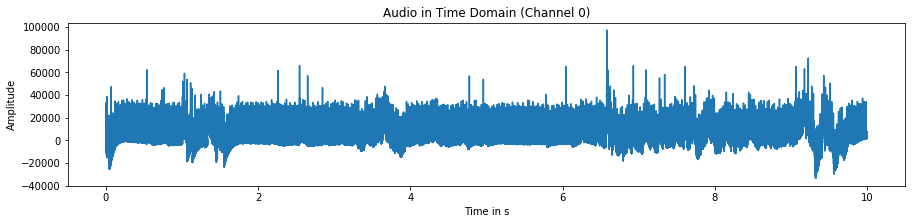

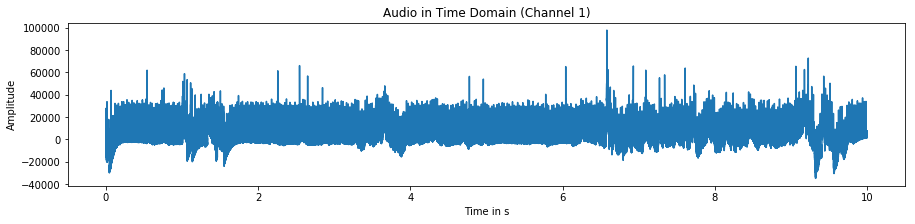

In [8]:
for channel_index in range(num_channels):
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Audio in Time Domain (Channel {})'.format(channel_index))
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    time_axis = np.arange(0, num_frames/sample_rate, 1/sample_rate)
    plt.plot(time_axis, frames[:, channel_index])
    plt.show()

# Frequency Spectrum

Plots the frequency spectrum of the signal

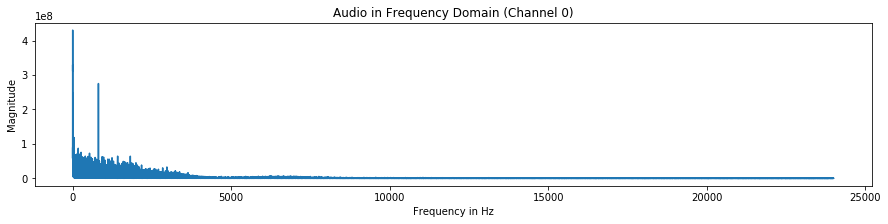

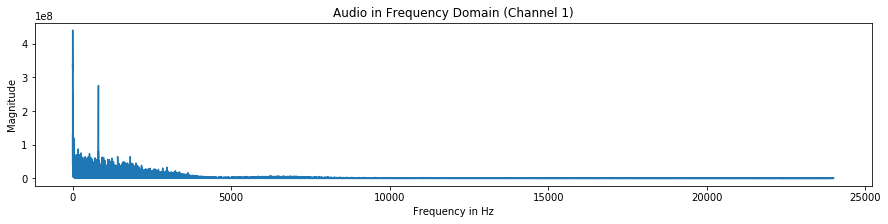

In [9]:
for channel_index in range(num_channels):
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Audio in Frequency Domain (Channel {})'.format(channel_index))
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude')
    temp = fft(frames[:, channel_index])
    yf = temp[1:len(temp)//2]
    xf = np.linspace(0.0, sample_rate/2, len(yf))
    plt.plot(xf, abs(yf))
    plt.show()

# Frequency Spectrum Over Time

Plots the Frequency spectrum over time

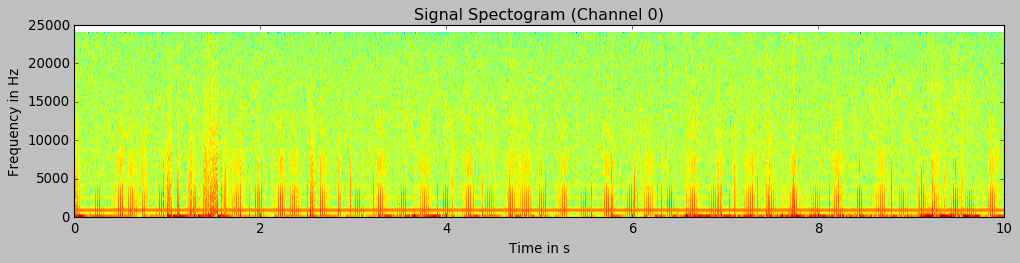

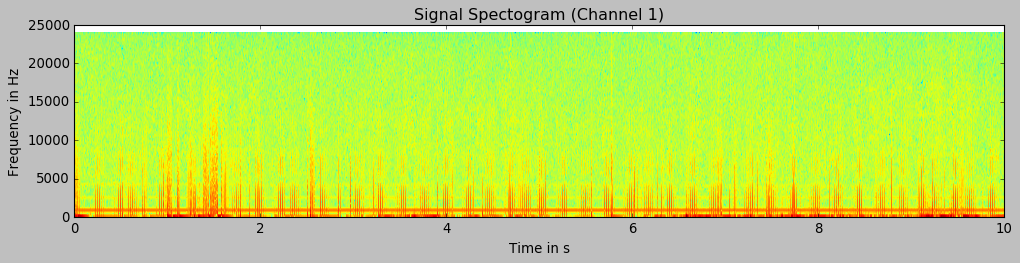

In [10]:
for channel_index in range(num_channels):
    np.seterr(divide='ignore', invalid='ignore')
    matplotlib.style.use("classic")
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Signal Spectogram (Channel {})'.format(channel_index))
    plt.xlabel('Time in s')
    plt.ylabel('Frequency in Hz')
    plt.specgram(frames[:, channel_index], Fs=sample_rate)

# Delay Effect

If a button is pressed, the corresponding LED will turn on and the target audio file will play. 

In [13]:
# Imports the necessary libraries
import _thread
import numpy
import time

# Defines the variables used in the cell
j = 0
outputLength = 10

# Creates the delay effect by playing the audio file and then playing the same audio file 1 second later
while(j!=1):
    for i in range(MAX_LEDS):
        if  Button.read(buttons[0]):
            leds[0].on()
            pAudio.play()
            
        if  Button.read(buttons[1]):
            leds[1].on()
            _thread.start_new_thread(pAudio.play,())
            time.sleep(1)
            _thread.start_new_thread(pAudio.play,())
            
        if  Button.read(buttons[2]):
            leds[2].on()
            j = 1
            